<a href="https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre3/CTR1_Exercice3_9b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 3.9b

## Résolution avec 5 équations différentielles

On desire résoudre les équations différentielles ci-dessous pour t = 5000 s avec Python:

$r_{1}=k_{1}\cdot C_{A}C_{B}$<br>
$r_{2}=\frac{k_{1}}{K_{c}}\cdot C_{C}C_{D}$<br>

$\frac{dN_{A}}{dt}=R_{A}\cdot V$<br>
$\frac{dN_{B}}{dt}=R_{B}\cdot V + \dot{V}C_{B,D}$<br>
$\frac{dN_{C}}{dt}=R_{C}\cdot V$<br>
$\frac{dN_{D}}{dt}=R_{D}\cdot V$<br>
$\frac{V}{dt}=\dot{V}$<br>

Avec<br>

- $k_{1}$ = 9.0·10<sup>-5</sup>
- $K_{c}$ = 1.08
- $\dot{V}$ = 0.05 L/s pour t $\leq$ 4000 ou 0 sinon

Les conditions initiales sont:

- N<sub>A0</sub> = 7.72⋅200 = 1544 mol
- N<sub>B0</sub> = 0 mol
- N<sub>C0</sub> = 0 mol
- N<sub>D0</sub> = 0 mol
- V<sub>0</sub> = 200 L

## Importer les outils

On commence par importer les bibliothèques nécessaire pour résoudre le problème avec python. Il vient:

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur


## Définir les constantes du problème

On commence à aborder le problème en définissant les constantes sur lesquelles se basent le problème.

In [0]:
k1 = 9e-5 # L/mol
Kc = 1.08 # -
Vdot = 0.05 # L/s
V0 = 200 # L
CA0 = 7.72 # mol/L
CB0 = 0 # mol/L
CC0 = 0 # mol/L
CD0 = 0 # mol/L
t_dosage = 4000 # s
CBD = 10.93 # mol/L

## Définir les équations à résoudre

Les équations à résoudre sont définies dans une fonction prenant en paramètres les variables dépendantes (premier paramètre), la variable indépendante, et les différentes constantes utilisées par les équations.

In [0]:
def equations(variables, t, V0, Vdot, k1, Kc, CBD, t_dosage):
    """Fonction représentant les équations à résoudre."""
    NA, NB, NC, ND, V = variables
    
    # SI t est supérieur au temps de dosage, on ne dose plus
    if t > t_dosage:
        Vdot = 0
        
    CA = NA/V
    CB = NB/V
    CC = NC/V
    CD = ND/V
    
    r1 = k1 * CA * CB
    r2 = k1/Kc * CC * CD
    
    RA = -r1 + r2
    RB = -r1 + r2
    RC = r1 - r2
    RD = r1 - r2
    
    dNAdt = RA * V
    dNBdt = RB * V + Vdot * CBD
    dNCdt = RC * V
    dNDdt = RD * V
    dVdt = Vdot
    
    return dNAdt, dNBdt, dNCdt, dNDdt, dVdt

## Définir les conditions initiales

Afin de résoudre ce type d'équations différentielles ordinaires, nous devons définir les conditions initiales du problème.

In [0]:
conditions_initiales = [V0 * CA0, V0 * CB0, V0 * CC0, V0 * CD0, V0]

## Résoudre le problème à l'aide du solveur



In [0]:
t = np.linspace(0, 5000, 10001) 


resultats = solveur.odeint(
    equations, 
    conditions_initiales, 
    t, 
    (V0, Vdot, k1, Kc, CBD, t_dosage)
)

On va récupérer les vecteurs associés à chaque variable de manière à pouvoir éventuellement les afficher séparemment.

In [0]:
NA = resultats[:,0]
NB = resultats[:,1]
NC = resultats[:,2]
ND = resultats[:,3]
V = resultats[:,4]

CA = NA/V
CB = NB/V
CC = NC/V
CD = ND/V

## Visualiser les résultats

Les valeurs de V n'évoluent pas sur la même échelle que celles de CA, CB, CC et CD. On décide de les visualiser sur des graphiques différents.


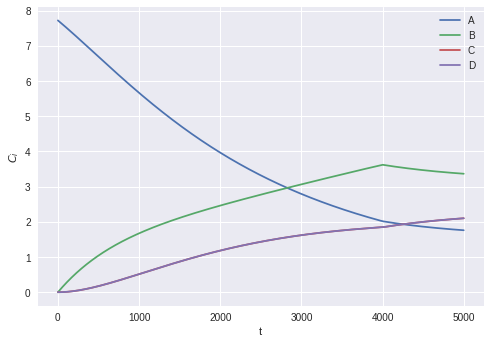

In [7]:
plt.figure(1)
plt.plot(t, CA, t, CB, t, CC, t, CD)

plt.xlabel('t')
plt.ylabel('$C_{i}$')
plt.legend(['A','B','C','D'])
plt.show()

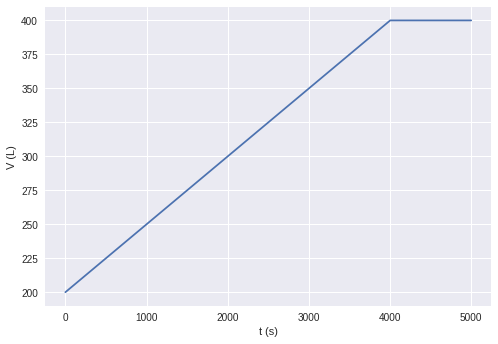

In [8]:
plt.figure(2)
plt.plot(t, V)
plt.xlabel('t (s)')
plt.ylabel('V (L)')
plt.show()